In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
## import iris datasets
iris= datasets.load_iris()

In [3]:
iris_data=pd.DataFrame(iris.data)

In [4]:
iris_data.columns=iris.feature_names

In [5]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
## standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
X_scaled=scaler.fit_transform(iris_data)

In [9]:
X_scaled.shape

(150, 4)

In [10]:
##Apply the PCA
##convert 4 feature to 2 feature
from sklearn.decomposition import PCA

In [11]:
pca=PCA(n_components=2)

In [14]:
pca_scaled=pca.fit_transform(X_scaled)
pca_scaled.shape

(150, 2)

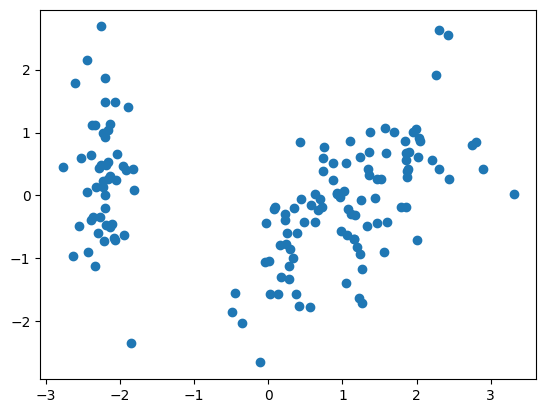

In [15]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

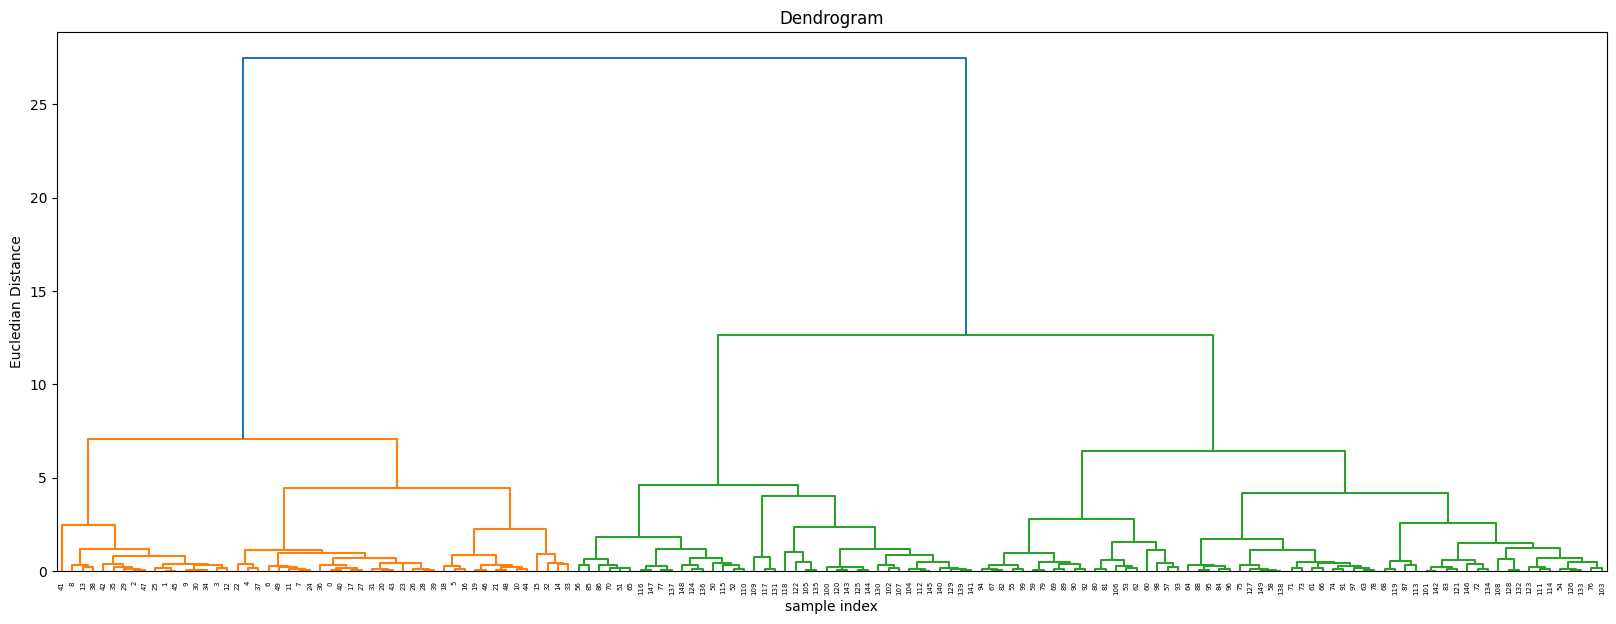

In [17]:
## Agglomerative Clustering
## To construct a dendogram
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendrogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendrogram')
plt.xlabel('sample index')
plt.ylabel('Eucledian Distance')

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [21]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

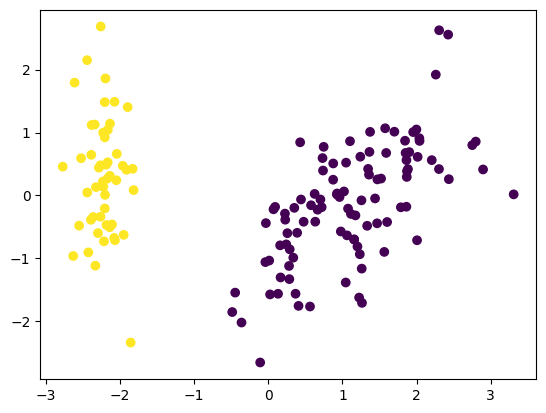

In [22]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [23]:
## silhouette score
from sklearn.metrics import silhouette_score

In [29]:
silhouette_coefficients=[]

#Notice we start at 2 clusters for silhouette coefficeint
for k in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=k, metric='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

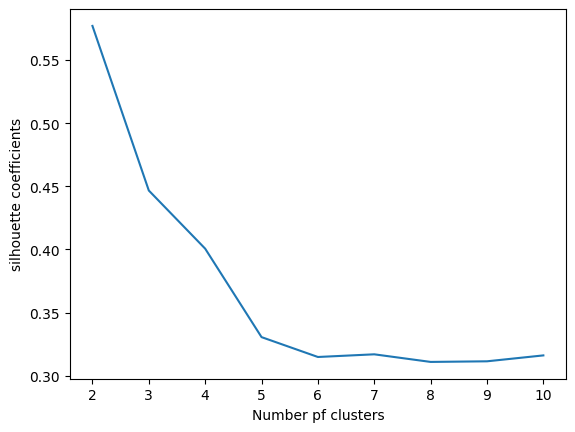

In [32]:
#plotting silhouettte score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number pf clusters")
plt.ylabel("silhouette coefficients")
plt.show()